In [0]:
import warnings
warnings.filterwarnings('ignore')

# Data processing and manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

# Configure visualization
%matplotlib inline
plb.rcParams['figure.figsize'] = 10, 8
mpl.style.use('ggplot')
sns.set_style('white')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Accuracy Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.concat([train,test], axis = 0)
print(full.describe(include = [int, float, object]))

        ApplicantIncome  CoapplicantIncome  ...  Property_Area Self_Employed
count        981.000000         981.000000  ...            981           926
unique              NaN                NaN  ...              3             2
top                 NaN                NaN  ...      Semiurban            No
freq                NaN                NaN  ...            349           807
mean        5179.795107        1601.916330  ...            NaN           NaN
std         5695.104533        2718.772806  ...            NaN           NaN
min            0.000000           0.000000  ...            NaN           NaN
25%         2875.000000           0.000000  ...            NaN           NaN
50%         3800.000000        1110.000000  ...            NaN           NaN
75%         5516.000000        2365.000000  ...            NaN           NaN
max        81000.000000       41667.000000  ...            NaN           NaN

[11 rows x 13 columns]


In [3]:
full.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


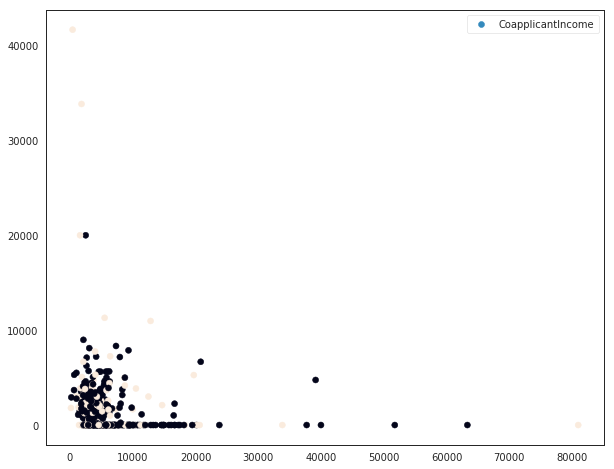

In [5]:
status = full.Loan_Status
status[status == 'Y'] = 2
status[status == 'N'] = 5
status[status == np.nan] = 999
plt.scatter(x = full.ApplicantIncome, y = full.CoapplicantIncome, c = full.Loan_Status)
plt.legend()
plt.show()


In [6]:
full.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID',
       'Loan_Status', 'Married', 'Property_Area', 'Self_Employed'],
      dtype='object')

##### Imputing the quantitative variables with median values.

In [0]:
full.Loan_Amount_Term.fillna(full.Loan_Amount_Term.median(), inplace = True)
full.LoanAmount.fillna(full.LoanAmount.median(), inplace = True)

### Manually encoding the nominal and ordinal variables.

##### Imputing the categorical variables with most common response

In [0]:
full.Gender.fillna('Male', inplace = True)
full.Dependents.fillna('0', inplace = True)
full.Credit_History.fillna(1, inplace = True)
full.Self_Employed.fillna('No', inplace = True)
full.Married.fillna('Yes', inplace = True)
train = full.iloc[:614,:]
test = full.iloc[614:, :]

## Feature Engineering

In [9]:
full['TotalIncome'] = full.ApplicantIncome + full.CoapplicantIncome
full['IncomeDebtRatio'] = full.TotalIncome / full.LoanAmount
train = full.iloc[:614,:]
test = full.iloc[614:, :]
full.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,IncomeDebtRatio
0,5849,0.0,1.0,0,Graduate,Male,126.0,360.0,LP001002,2,No,Urban,No,5849.0,46.420635
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,5,Yes,Rural,No,6091.0,47.585938
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,2,Yes,Urban,Yes,3000.0,45.454545
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,2,Yes,Urban,No,4941.0,41.175000
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,2,No,Urban,No,6000.0,42.553191


In [0]:
def model_classifier(model,X, y):
    #Fitting the model with training data
    model.fit(X, y)
    
    #Calculating the Train Accuracy:
    train_predict = model.predict(X)
    print('Train Accurcay Score : ', accuracy_score(y, train_predict))
    
    #Calculating the cross validation score
    kfold = StratifiedKFold(n_splits = 4)
    scores = []
    
    # Performing K Fold Cross validation test.
    for train_index, test_index in kfold.split(X, y):
        model.fit(X.iloc[train_index,:], y[train_index])
        prediction = model.predict(X.iloc[test_index, :])
        scores.append(accuracy_score(y[test_index], prediction))
    
    #Printing the K Fold validation score
    print('\nKFold Score : ', np.mean(scores))
    
    # Since this is a classification problem 
    # Printing the confusion matrix
    conf_mat = confusion_matrix(y[test_index], prediction)
    print('\nConfusion Matrix')
    print(conf_mat)
    

    # print('\nProportioanl confusion_matrix\n')
    # print(conf_mat/conf_mat[:].sum())    
    
    # Print the ROC-AUC score
    # y_test_series = 
    # label_encoder = LabelEncoder()
    # label_encoder.fit(y_test_series)
    # y_test_series = label_encoder.transform(y_test_series)
    # pd.Series(y.iloc[test_index,:])
    # print('ROC-AUC Score ',roc_auc_score(y_test_series
    #                                    , model.decision_function(X.iloc[test_index,:])))    

In [0]:
features = ['Credit_History','Dependents',
       'Education', 'LoanAmount', 'Loan_Amount_Term', 
       'Married', 'Property_Area', 
       'TotalIncome', 'IncomeDebtRatio']
response = ['Loan_Status']
X = pd.get_dummies(train[features])
y = train[response]

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Unused features
# 'ApplicantIncome', 'CoapplicantIncome',

### Trying different Classification Models.

#### Logistic Regression

In [12]:
logistic = LogisticRegression()
model_classifier(logistic, X, y)

Train Accurcay Score :  0.8078175895765473

KFold Score :  0.8062452253628725

Confusion Matrix
[[101   4]
 [ 23  25]]


#### Decision Tree Classifier

In [13]:
decisiontree = DecisionTreeClassifier()
model_classifier(decisiontree, X, y)

Train Accurcay Score :  1.0

KFold Score :  0.6922587216704863

Confusion Matrix
[[85 20]
 [28 20]]


#### Naive Bayes

In [14]:
bayes = GaussianNB()
model_classifier(bayes, X, y)

Train Accurcay Score :  0.8029315960912052

KFold Score :  0.7866692131398014

Confusion Matrix
[[93 12]
 [20 28]]


#### K Nearest Neighbors 


In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)
model_classifier(knn, X, y)

Train Accurcay Score :  1.0

KFold Score :  0.5651472710296239

Confusion Matrix
[[76 29]
 [31 17]]


#### Random Forest Classifier

In [16]:
randomforest = RandomForestClassifier()
model_classifier(randomforest, X, y)
randomforest.feature_importances_

Train Accurcay Score :  0.9853420195439739

KFold Score :  0.7557401748578219

Confusion Matrix
[[92 13]
 [24 24]]


array([0.18179657, 0.20382827, 0.05111399, 0.17207924, 0.20261608,
       0.01411328, 0.02284401, 0.01823019, 0.01245585, 0.01159814,
       0.01233438, 0.01524018, 0.01708362, 0.02243331, 0.02230695,
       0.01992593])

#### Support Vector Classifier 


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)
svclassifier = SVC()
model_classifier(svclassifier, X_scaled, y)

Train Accurcay Score :  0.8094462540716613

KFold Score :  0.8095025889143536

Confusion Matrix
[[104   1]
 [ 25  23]]


## Principal Component Analysis

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=16)
X_normailesed = StandardScaler().fit_transform(X)
pca.fit(X_normailesed)
print(pca)
X_pca = pca.transform(X_normailesed)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


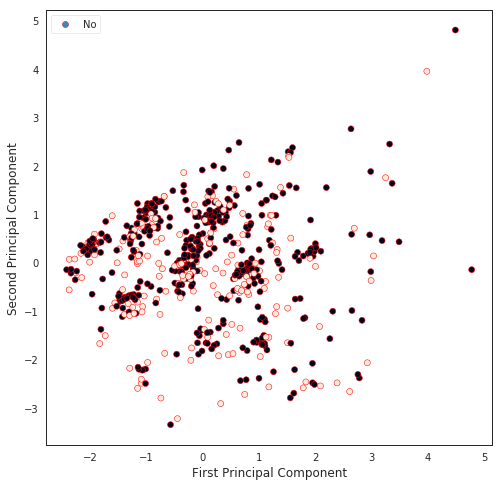

In [20]:
plt.figure(figsize= (8,8))
plt.scatter(X_pca[:,4],X_pca[:,5], c = y, edgecolors='red')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(['No', 'Yes'])
plt.show()

In [21]:
(pca.components_)

array([[ 1.30922152e-04,  2.42362039e-01, -1.20268896e-01,
         2.07892315e-01,  2.31087039e-02, -4.48540567e-01,
         1.92526064e-01,  2.61742126e-01,  1.89191139e-01,
         4.42850966e-02, -4.42850966e-02, -5.17126851e-01,
         5.17126851e-01, -2.85344949e-02, -2.37310243e-03,
         3.00514455e-02],
       [ 7.78288911e-02,  2.60072954e-01,  6.57270602e-02,
         3.40864687e-01,  2.15297789e-01,  9.75224998e-02,
         2.14223097e-03, -1.12353879e-01, -2.59954927e-02,
         5.91249036e-01, -5.91249036e-01,  1.05930581e-01,
        -1.05930581e-01, -1.01097817e-01,  5.83854651e-02,
         3.74881917e-02],
       [-1.06829206e-01,  2.67011525e-01, -1.51893453e-01,
         4.65663425e-01,  2.86842831e-01,  3.95408661e-02,
        -4.62977487e-02, -1.78524724e-01,  2.31692455e-01,
        -2.18199618e-01,  2.18199618e-01,  1.28439137e-01,
        -1.28439137e-01,  3.58367788e-01, -4.77278592e-01,
         1.46295528e-01],
       [-1.42515041e-02,  2.35909141e

### Trying to train svc model on new X_pca data

In [22]:
svc = SVC(kernel = 'linear')
X_pca_df = pd.DataFrame(X_pca)
model_classifier(svc, X_pca_df, y)

Train Accurcay Score :  0.8094462540716613

KFold Score :  0.8095025889143536

Confusion Matrix
[[104   1]
 [ 25  23]]


#### Gradient Boosting Classifier

In [23]:
gbclassifier = GradientBoostingClassifier()
model_classifier(gbclassifier, X, y)

Train Accurcay Score :  0.8876221498371335

KFold Score :  0.7980965113318055

Confusion Matrix
[[94 11]
 [24 24]]


#### Adaptive Boosting Classifier

In [24]:
abclassifier = AdaBoostClassifier()
model_classifier(abclassifier, X, y)

Train Accurcay Score :  0.8648208469055375

KFold Score :  0.8013114336643749

Confusion Matrix
[[92 13]
 [21 27]]


#### XGBoost Classifier

In [25]:
xgb = XGBClassifier(objective= 'binary:logistic', eval_metric = 'auc', scale_pos_weight=0.35, early_stopping_rounds=100)
model_classifier(xgb, X, y)

Train Accurcay Score :  0.8420195439739414

KFold Score :  0.8013644851880146

Confusion Matrix
[[103   2]
 [ 27  21]]


### Conclusion
The Naive bayes and xgboost are performing very well.